Pre-processing Data for the prediction of Gold Prices:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
gold_price=pd.read_csv("/content/gld_price_data.csv")
gold_price.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
gold_price.shape
gold_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
gold_price.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [ ]:
gold_price.columns

Index(['Date', 'SPX', 'GLD', 'USO', 'SLV', 'EUR/USD'], dtype='object')

In [ ]:
gold_price.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [ ]:
gold_price_correlation=gold_price.corr()
gold_price_correlation

<ipython-input-181-47ea3fe20f11>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  gold_price_correlation=gold_price.corr()


,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


<Axes: title={'center': 'Correlation Matrix\n'}>

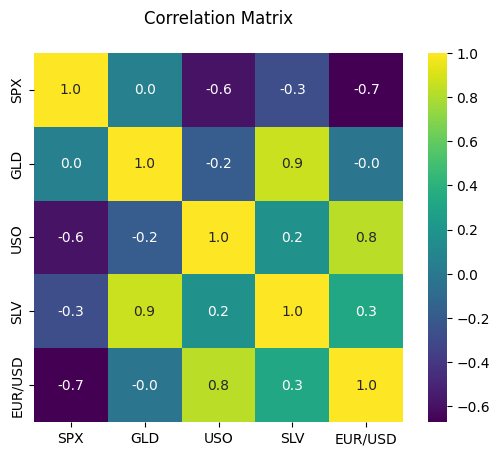

In [ ]:
plt.title("Correlation Matrix\n")
sns.heatmap(gold_price_correlation,cbar=True,square=True,fmt='.1f',annot=True,cmap='viridis')

Splitting into Train and Test sets:

In [ ]:
x=gold_price.drop(['Date','GLD'],axis=1)
y=gold_price['GLD']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.30, random_state = 0)

In [ ]:
y_test = list(y_test)

Using K-Nearest Neighbors Regressor Model:

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn=KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)
prediction1=knn.predict(X_test)

mse = mean_squared_error(y_test, prediction1)
print("Mean Squared Error using KNN Model:", mse)

Mean Squared Error using KNN Model: 58.13806067807803


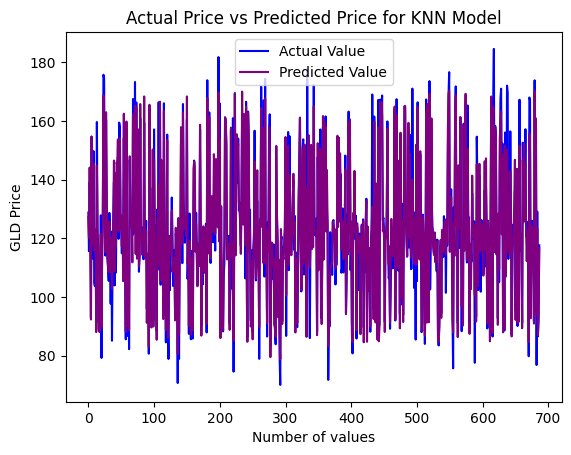

In [ ]:
plt.plot(y_test, color='blue', label = 'Actual Value')
plt.plot(prediction1, color='purple', label='Predicted Value')
plt.title('Actual Price vs Predicted Price for KNN Model')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

Using Linear Regression Model:

In [ ]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
prediction2 = linear_reg.predict(X_test)

mse = mean_squared_error(y_test, prediction2)
print("Mean Squared Error using Linear Regression Model:", mse)


Mean Squared Error using Linear Regression Model: 67.12269385825603


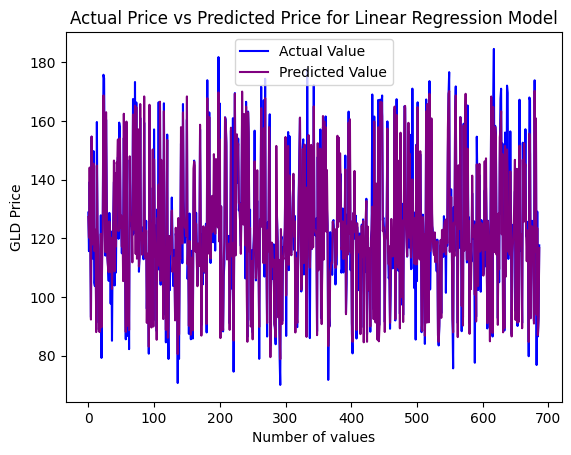

In [ ]:
plt.plot(y_test, color='blue', label = 'Actual Value')
plt.plot(prediction1, color='purple', label='Predicted Value')
plt.title('Actual Price vs Predicted Price for Linear Regression Model')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

In [ ]:
predictions = np.mean([prediction1, prediction2], axis=0)

mse = mean_squared_error(y_test, predictions)
variance = np.var(y_test)
relative_performance = mse/variance

print("Mean Squared Error is: ",mse)
print("Variance of Gold Price: ",variance)
print("Relative Performance: ",relative_performance)


Mean Squared Error is:  41.42296381070178
Variance of Gold Price:  533.9002134575514
Relative Performance:  0.07758559140189439
